In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('sep1.csv')

In [3]:
dataset.head()

,year,month,day,lat,lon,sm_50
0,2019,8,28,34.82,-87.99,NaN
1,2019,8,28,33.53,-103.63,0.16
2,2019,8,28,33.63,-88.77,0.87
3,2019,8,28,29.10,-81.63,0.73
4,2019,8,28,36.57,-115.20,0.15


In [4]:
dataset.shape

(787, 6)

In [5]:
dataset.index

RangeIndex(start=0, stop=787, step=1)

In [6]:
dataset.columns

Index([u'year', u'month', u'day', u'lat', u'lon', u'sm_50'], dtype='object')

In [7]:
dataset.mean()

year     2019.000000
month       8.000000
day        28.000000
lat        23.204963
lon       -35.435598
sm_50       0.485016
dtype: float64

In [8]:
dataset=dataset.fillna(dataset.mean())

In [9]:
dataset.head()

,year,month,day,lat,lon,sm_50
0,2019,8,28,34.82,-87.99,0.485016
1,2019,8,28,33.53,-103.63,0.160000
2,2019,8,28,33.63,-88.77,0.870000
3,2019,8,28,29.10,-81.63,0.730000
4,2019,8,28,36.57,-115.20,0.150000


In [10]:
X = dataset.iloc[: ,3:5]
y = dataset.iloc[: ,-1].values
X.head()

,lat,lon
0,34.82,-87.99
1,33.53,-103.63
2,33.63,-88.77
3,29.10,-81.63
4,36.57,-115.20


In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state = 0)

C:\Users\Admin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
principalDf.head()

,principal component 1,principal component 2
0,53.822249,-0.199244
1,68.798081,-4.889464
2,54.322138,-1.531390
3,46.362177,-4.384375
4,80.753160,-4.462180


In [15]:
finalDf = pd.concat([principalDf, dataset[['sm_50']]], axis = 1)

In [16]:
finalDf.head()

,principal component 1,principal component 2,sm_50
0,53.822249,-0.199244,0.485016
1,68.798081,-4.889464,0.160000
2,54.322138,-1.531390,0.870000
3,46.362177,-4.384375,0.730000
4,80.753160,-4.462180,0.150000


In [17]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [18]:
var

array([0.98428148, 0.01571852])

In [19]:
var1

array([ 98.43, 100.  ])

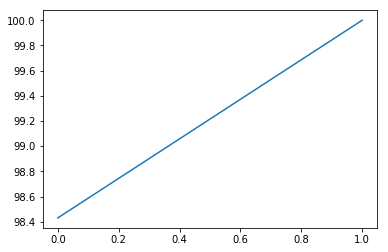

In [20]:
plt.plot(var1)

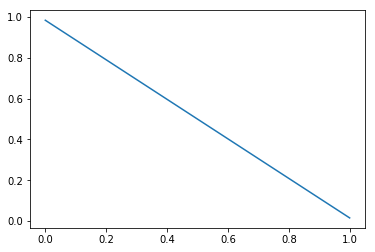

In [21]:
plt.plot(var)